In [1]:
import pandas as pd
import support.df_init as df_init


df = df_init.init()
df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal,totalMedia
0,Carmencita,"(5, 6]",1894,1894.0,1.0,0,2089,1,10,2,...,1,3,5.7,"[DE, US, HU, GR, RU, UA, JP]",9,0,1,[silent],0,6
1,Un bon bock,"(5, 6]",1892,1892.0,12.0,0,183,1,10,2,...,0,0,5.4,"[HU, DE, FR, RO, RU, JP]",3,0,1,[silent],0,4
2,Chinese Opium Den,"(4, 5]",1894,1894.0,1.0,0,195,1,10,1,...,0,1,5.0,"[US, DE, PT, HU, RU]",4,0,1,[silent],0,2
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1894.0,1.0,1,2237,1,10,3,...,1,6,5.4,"[UA, JP, HU, US, DE, RU]",6,0,1,[silent],0,7
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896,1896.0,1.0,0,13115,1,10,12,...,6,5,7.4,"[HU, DE, TR, FI, FR, IT, ES, SK, PL, GB, XWW, ...",21,0,2,[silent],0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,Nuestra película,"(6, 7]",1993,1993.0,96.0,0,11,1,10,0,...,0,2,7.0,[CO],1,1,1,[],0,11
149527,Eco,"(6, 7]",2019,2019.0,14.0,0,15,1,10,4,...,6,3,6.4,[ES],5,1,1,[],0,57
149528,Women Take Center Stage,"(5, 6]",2019,2019.0,NaN,0,12,1,10,2,...,1,0,5.6,[],0,0,0,[],0,37
149529,Horrid Henry and the Christening Crisis,"(7, 8]",2011,2011.0,10.0,0,9,1,10,1,...,7,0,7.1,[],0,3,1,[],0,16


In [2]:
df['totalMedia'] = df['totalVideos'] + df['totalImages'] + df['totalCredits']
df['totalMedia']

0          6
1          4
2          2
3          7
4         23
          ..
149526    11
149527    57
149528    37
149529    16
149530    36
Name: totalMedia, Length: 149531, dtype: int64

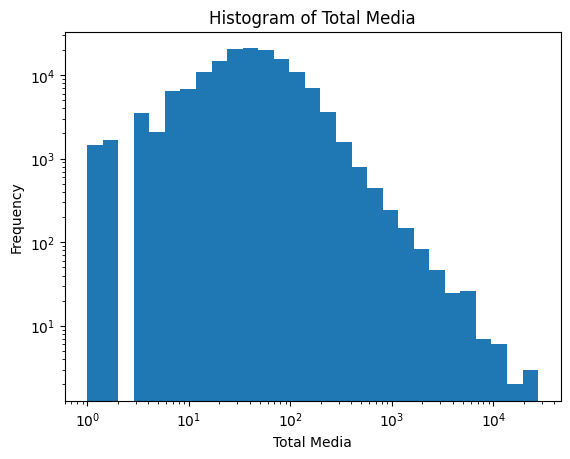

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df['totalMedia'],
         bins=np.logspace(np.log10(df['totalMedia'].min()+1),
         np.log10(df['totalMedia'].max()), 30), log=True)
plt.xscale('log')
plt.title('Histogram of Total Media')
plt.xlabel('Total Media')
plt.ylabel('Frequency')
# plt.yscale('log')
plt.show()

In [4]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'worstRating', 'bestRating', 'totalImages',
       'totalVideos', 'totalCredits', 'criticReviewsTotal', 'titleType',
       'awardNominationsExcludeWins', 'canHaveEpisodes', 'isRatable',
       'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount',
       'countryOfOrigin', 'genres', 'castNumber', 'companiesNumber',
       'averageRating', 'regions', 'externalLinks', 'writerCredits',
       'directorsCredits', 'soundMixes', 'quotesTotal', 'totalMedia'],
      dtype='object')

In [5]:
df['countryOfOrigin']

0         [US]
1         [FR]
2         [US]
3         [US]
4         [FR]
          ... 
149526    [CO]
149527    [ES]
149528      []
149529      []
149530      []
Name: countryOfOrigin, Length: 149531, dtype: object

In [6]:
df.to_csv('dm2_dataset_2425_imdb/preprocessed_full.csv', index=False)

In [7]:
df['regions']

0                              [DE, US, HU, GR, RU, UA, JP]
1                                  [HU, DE, FR, RO, RU, JP]
2                                      [US, DE, PT, HU, RU]
3                                  [UA, JP, HU, US, DE, RU]
4         [HU, DE, TR, FI, FR, IT, ES, SK, PL, GB, XWW, ...
                                ...                        
149526                                                 [CO]
149527                                                 [ES]
149528                                                   []
149529                                                   []
149530                                                   []
Name: regions, Length: 149531, dtype: object

In [8]:
df.loc[df.apply(lambda row: set(row['countryOfOrigin']).issubset(set(row['regions'])), axis=1)]

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal,totalMedia
0,Carmencita,"(5, 6]",1894,1894.0,1.0,0,2089,1,10,2,...,1,3,5.7,"[DE, US, HU, GR, RU, UA, JP]",9,0,1,[silent],0,6
1,Un bon bock,"(5, 6]",1892,1892.0,12.0,0,183,1,10,2,...,0,0,5.4,"[HU, DE, FR, RO, RU, JP]",3,0,1,[silent],0,4
2,Chinese Opium Den,"(4, 5]",1894,1894.0,1.0,0,195,1,10,1,...,0,1,5.0,"[US, DE, PT, HU, RU]",4,0,1,[silent],0,2
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1894.0,1.0,1,2237,1,10,3,...,1,6,5.4,"[UA, JP, HU, US, DE, RU]",6,0,1,[silent],0,7
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896,1896.0,1.0,0,13115,1,10,12,...,6,5,7.4,"[HU, DE, TR, FI, FR, IT, ES, SK, PL, GB, XWW, ...",21,0,2,[silent],0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,Nuestra película,"(6, 7]",1993,1993.0,96.0,0,11,1,10,0,...,0,2,7.0,[CO],1,1,1,[],0,11
149527,Eco,"(6, 7]",2019,2019.0,14.0,0,15,1,10,4,...,6,3,6.4,[ES],5,1,1,[],0,57
149528,Women Take Center Stage,"(5, 6]",2019,2019.0,NaN,0,12,1,10,2,...,1,0,5.6,[],0,0,0,[],0,37
149529,Horrid Henry and the Christening Crisis,"(7, 8]",2011,2011.0,10.0,0,9,1,10,1,...,7,0,7.1,[],0,3,1,[],0,16


In [9]:
import support.countries_handling as ch

ch.get_encoded(df['regions'].iloc[2])

{'_NA': 0, '_EU': 0, '_AF': 0, '_AS': 0, '_OC': 0, '_SA': 0, '_UNK': 0}

In [10]:
ch.explode_continents_and_freq_enc(df)

,regions_freq_enc,regions_EU,regions_NA,regions_AS,regions_AF,regions_OC,regions_SA,regions_UNK,countryOfOrigin_freq_enc,countryOfOrigin_NA,countryOfOrigin_AF,countryOfOrigin_AS,countryOfOrigin_EU,countryOfOrigin_OC,countryOfOrigin_SA,countryOfOrigin_UNK
0,0.305053,0,0,0,0,0,0,0,0.399732,0,0,0,0,0,0,0
1,0.202410,0,0,0,0,0,0,0,0.046115,0,0,0,0,0,0,0
2,0.261785,0,0,0,0,0,0,0,0.399732,0,0,0,0,0,0,0
3,0.286197,0,0,0,0,0,0,0,0.399732,0,0,0,0,0,0,0
4,0.662479,0,0,0,0,0,0,0,0.046115,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,0.001452,0,0,0,0,0,0,0,0.001417,0,0,0,0,0,0,0
149527,0.047290,0,0,0,0,0,0,0,0.017834,0,0,0,0,0,0,0
149528,0.000000,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0
149529,0.000000,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0
